In [322]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [135]:
df_votants = pd.read_csv('Data/database_deputes.csv', index_col=0)
df_votes = pd.read_csv('Data/database_votes2.csv', index_col=0)

In [180]:
#df_scrutins 58votants 56pour 0contre 2non-votants 1abstention
# 35votants 9 26 2 0   37 votants
#df_votes
#L = df_votants[df_votants['idScrutin'] == 1]
#L.shape()
df_votes[df_votes['idScrutin'] == 10].vote

607    Non-votant
608          Pour
609          Pour
610          Pour
611          Pour
612          Pour
613          Pour
614          Pour
615          Pour
616          Pour
617    Non-votant
618          Pour
619          Pour
620          Pour
621          Pour
622          Pour
623          Pour
624          Pour
625          Pour
626          Pour
627          Pour
628          Pour
629          Pour
630          Pour
631          Pour
632          Pour
633          Pour
634          Pour
635          Pour
636          Pour
637          Pour
638          Pour
639          Pour
640          Pour
641          Pour
642          Pour
Name: vote, dtype: object

In [179]:
df_votes[df_votes['idScrutin'] == 10].iloc[:,:15]

,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,contre,non_votants,non_votants_volontaires,abstention
607,10,PA606171,Non-votant,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
608,10,PA721450,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
609,10,PA722228,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
610,10,PA719806,Pour,PO765636,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
611,10,PA719608,Pour,PO723569,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
612,10,PA719372,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
613,10,PA720652,Pour,PO730970,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
614,10,PA719740,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
615,10,PA719798,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1
616,10,PA720222,Pour,PO730964,2019-06-14,SPO,l'amendement n° 3587 du Gouvernement après l'a...,"Président du groupe ""La République en Marche""",PO717460,39,38,0,2,0,1


In [165]:
df_votes.vote.unique()

array(['Non-votant', 'Pour', 'Contre'], dtype=object)

## 1. One Hot Encoding :

### 1.1 Colonne demandeur

In [5]:
groupes = ["La République en Marche", "Socialistes et apparentés", "La France insoumise", 
           "Écologie Démocratie Solidarité", "UDI, Agir et Indépendants", "Nouvelle Gauche", 
           "Gauche démocrate et républicaine", "Mouvement Démocrate et apparentés", "Libertés et Territoires",
          "Les Républicains", "Agir Ensemble", "Commission", "Conférence des Présidents", "Gouvernement"]

In [6]:
def one_hot_demandeur (df_src, groupes):
    df = df_src.copy()
    df['demandeurs'] = 0
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des demandeurs
    for groupe in groupes:
        df[groupe] = 0 # Initilise à 0 pour tous les demandeurs
    df['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe scrutin et on vérifie la présence de chaque demandeur 
    # dans la colonne demandeur
    
    for index, demandeur in enumerate(df.demandeur):
    
        indefini = True
        if type(demandeur) == str :
            for groupe in groupes :
                if groupe in demandeur :
                    indefini = False
                    df.loc[index, groupe] = 1
                    df.loc[index, 'demandeurs'] = groupe
        elif indefini :
            df.loc[index, 'Indéfini'] = 1
    
    return df

In [7]:
df_votes_One_Hot = one_hot_demandeur(df_votes, groupes)
df_votes_One_Hot 

,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,...,Nouvelle Gauche,Gauche démocrate et républicaine,Mouvement Démocrate et apparentés,Libertés et Territoires,Les Républicains,Agir Ensemble,Commission,Conférence des Présidents,Gouvernement,Indéfini
0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,0,0
1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,0,0
2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,0,0
3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,0,0
4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290491,3116,PA719302,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,0
290492,3116,PA719600,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,0
290493,3116,PA720772,Contre,PO730970,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,0
290494,3116,PA720310,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_votes_One_Hot_ = df_votes_One_Hot.copy()

In [9]:
df_votes_One_Hot_ = df_votes_One_Hot[['idVotant', 'vote', "La République en Marche", "Socialistes et apparentés", "La France insoumise", 
           "Écologie Démocratie Solidarité", "UDI, Agir et Indépendants", "Nouvelle Gauche", 
           "Gauche démocrate et républicaine", "Mouvement Démocrate et apparentés", "Libertés et Territoires",
          "Les Républicains", "Agir Ensemble", "Commission", "Conférence des Présidents", "Gouvernement" ]]


### 1. 2. Colonne vote

In [10]:
groupes = ['Non-votant', 'Pour', 'Contre']

def one_hot_vote (df_src, groupes):
    df = df_src.copy()
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des votes
    for groupe in groupes:
        df[groupe] = 0 # Initilise à 0 pour tous les votes
    df['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe scrutin et on vérifie la présence de chaque demandeur 
    # dans la colonne demandeur
    
    for index, vote in enumerate(df.vote):
    
        indefini = True
        if type(vote) == str :
            for groupe in groupes :
                if groupe in vote :
                    indefini = False
                    df.loc[index, groupe] = 1
        elif indefini :
            df.loc[index, 'Indéfini'] = 1
    
    return df

In [11]:
df_votes_One_Hot_ = one_hot_vote(df_votes_One_Hot_, groupes)

In [12]:
df_votes_One_Hot = one_hot_vote(df_votes_One_Hot, groupes)

In [13]:
df_votes_One_Hot_ = df_votes_One_Hot_.drop(['vote'], axis=1)

In [14]:
df_votes_One_Hot


,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,...,Libertés et Territoires,Les Républicains,Agir Ensemble,Commission,Conférence des Présidents,Gouvernement,Indéfini,Non-votant,Pour,Contre
0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,1,0,0
1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,1,0,0
2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,1,0
3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,1,0
4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290491,3116,PA719302,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,1
290492,3116,PA719600,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,1
290493,3116,PA720772,Contre,PO730970,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,1
290494,3116,PA720310,Contre,PO730964,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,...,0,0,0,0,0,0,0,0,0,1


**Statistiques du votants en fonction du demandeur :**

In [15]:
df_votes_pour = df_votes_One_Hot_[df_votes_One_Hot_['Pour'] == 1]
df_votes_contre = df_votes_One_Hot_[df_votes_One_Hot_['Contre'] == 1]
df_votes_nonvotant = df_votes_One_Hot_[df_votes_One_Hot_['Non-votant'] == 1]

df_votes_pour = df_votes_pour.groupby('idVotant').sum()
df_votes_contre = df_votes_contre.groupby('idVotant').sum()
df_votes_nonvotant = df_votes_nonvotant.groupby('idVotant').sum()

df_votes_total = df_votes_pour.add(df_votes_contre, fill_value=0)
df_votes_total = df_votes_total.add(df_votes_nonvotant, fill_value=0)
df_votes_total

,La République en Marche,Socialistes et apparentés,La France insoumise,Écologie Démocratie Solidarité,"UDI, Agir et Indépendants",Nouvelle Gauche,Gauche démocrate et républicaine,Mouvement Démocrate et apparentés,Libertés et Territoires,Les Républicains,Agir Ensemble,Commission,Conférence des Présidents,Gouvernement,Non-votant,Pour,Contre,Indéfini
idVotant,,,,,,,,,,,,,,,,,,
PA1008,51.0,83.0,142.0,9.0,35.0,40.0,109.0,11.0,17.0,157.0,0.0,0.0,46.0,4.0,0.0,444.0,201.0,0.0
PA1012,28.0,32.0,64.0,5.0,20.0,19.0,45.0,1.0,8.0,104.0,0.0,1.0,32.0,2.0,0.0,220.0,114.0,0.0
PA1029,8.0,8.0,21.0,3.0,2.0,4.0,13.0,1.0,1.0,21.0,0.0,0.0,32.0,2.0,0.0,53.0,57.0,0.0
PA1198,30.0,39.0,68.0,4.0,11.0,28.0,62.0,4.0,8.0,72.0,0.0,0.0,42.0,3.0,0.0,225.0,112.0,0.0
PA1206,12.0,23.0,34.0,2.0,2.0,12.0,32.0,0.0,4.0,37.0,1.0,0.0,28.0,2.0,0.0,96.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,4.0,0.0
PA856,36.0,40.0,58.0,6.0,21.0,28.0,67.0,3.0,10.0,96.0,0.0,0.0,38.0,2.0,0.0,214.0,160.0,0.0
PA923,12.0,22.0,44.0,4.0,13.0,14.0,28.0,2.0,3.0,64.0,0.0,0.0,32.0,2.0,0.0,134.0,97.0,0.0


In [16]:
df_votes_pour = (df_votes_pour/df_votes_total).fillna(0)
df_votes_contre = (df_votes_contre/df_votes_total).fillna(0)
df_votes_nonvotant = (df_votes_nonvotant/df_votes_total).fillna(0)

In [17]:
df_votes_pour = df_votes_pour.drop(['Pour', 'Contre', 'Non-votant', 'Indéfini'], axis=1)
df_votes_contre = df_votes_contre.drop(['Pour', 'Contre', 'Non-votant', 'Indéfini'], axis=1)
df_votes_nonvotant = df_votes_nonvotant.drop(['Pour', 'Contre', 'Non-votant', 'Indéfini'], axis=1)

In [18]:
df_votes_pour = df_votes_pour.rename(columns={"La République en Marche" : "La République en Marche Pour", 
                                              "Socialistes et apparentés" : "Socialistes et apparentés Pour", 
                                              "La France insoumise" : "La France insoumise Pour", 
        "Écologie Démocratie Solidarité" : "Écologie Démocratie Solidarité Pour", "UDI, Agir et Indépendants" : "UDI, Agir et Indépendants Pour" , 
        "Nouvelle Gauche" : "Nouvelle Gauche Pour", "Gauche démocrate et républicaine" : "Gauche démocrate et républicaine Pour", 
        "Mouvement Démocrate et apparentés"  : "Mouvement Démocrate et apparentés Pour", "Libertés et Territoires"  : "Libertés et Territoires Pour",
          "Les Républicains" : "Les Républicains Pour", "Agir Ensemble" : "Agir Ensemble Pour", 
            "Commission" : "Commission Pour ", "Conférence des Présidents" : "Conférence des Présidents Pour",
                        "Gouvernement": "Gouvernement Pour"})


df_votes_contre = df_votes_contre.rename(columns={"La République en Marche" : "La République en Marche Contre", 
                                              "Socialistes et apparentés" : "Socialistes et apparentés Contre", 
                                              "La France insoumise" : "La France insoumise Contre", 
        "Écologie Démocratie Solidarité" : "Écologie Démocratie Solidarité Contre", "UDI, Agir et Indépendants" : "UDI, Agir et Indépendants Contre" , 
        "Nouvelle Gauche" : "Nouvelle Gauche Contre", "Gauche démocrate et républicaine" : "Gauche démocrate et républicaine Contre", 
        "Mouvement Démocrate et apparentés"  : "Mouvement Démocrate et apparentés Contre", "Libertés et Territoires"  : "Libertés et Territoires Contre",
          "Les Républicains" : "Les Républicains Contre", "Agir Ensemble" : "Agir Ensemble Contre", 
            "Commission" : "Commission Contre ", "Conférence des Présidents" : "Conférence des Présidents Contre",
                        "Gouvernement": "Gouvernement Contre"})



df_votes_nonvotant = df_votes_nonvotant.rename(columns={"La République en Marche" : "La République en Marche Non-votant", 
                                              "Socialistes et apparentés" : "Socialistes et apparentés Non-votant", 
                                              "La France insoumise" : "La France insoumise Non-votant", 
        "Écologie Démocratie Solidarité" : "Écologie Démocratie Solidarité Non-votant", "UDI, Agir et Indépendants" : "UDI, Agir et Indépendants Non-votant" , 
        "Nouvelle Gauche" : "Nouvelle Gauche Non-votant", "Gauche démocrate et républicaine" : "Gauche démocrate et républicaine Non-votant", 
        "Mouvement Démocrate et apparentés"  : "Mouvement Démocrate et apparentés Non-votant", "Libertés et Territoires"  : "Libertés et Territoires Non-votant",
          "Les Républicains" : "Les Républicains Non-votant", "Agir Ensemble" : "Agir Ensemble Non-votant", 
            "Commission" : "Commission Non-votant ", "Conférence des Présidents" : "Conférence des Présidents Non-votant",
                        "Gouvernement": "Gouvernement Non-votant"})

On fusionne les dataframes : 

In [19]:
df_cluster = df_votes_contre.merge(df_votes_nonvotant, on='idVotant', how='left')
df_cluster = df_cluster.merge(df_votes_pour, on='idVotant', how='left')
df_cluster

,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,Les Républicains Contre,...,"UDI, Agir et Indépendants Pour",Nouvelle Gauche Pour,Gauche démocrate et républicaine Pour,Mouvement Démocrate et apparentés Pour,Libertés et Territoires Pour,Les Républicains Pour,Agir Ensemble Pour,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,0.414013,...,0.628571,0.725000,0.706422,0.818182,0.823529,0.585987,0.0,0.000000,0.413043,0.500000
PA1012,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,0.250000,...,0.850000,0.526316,0.666667,0.000000,0.875000,0.750000,0.0,1.000000,0.437500,0.000000
PA1029,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,0.428571,...,1.000000,0.250000,0.538462,1.000000,1.000000,0.571429,0.0,0.000000,0.343750,0.000000
PA1198,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,0.402778,...,0.454545,0.750000,0.758065,1.000000,0.750000,0.597222,0.0,0.000000,0.357143,0.333333
PA1206,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,0.432432,...,1.000000,0.500000,0.562500,0.000000,0.500000,0.567568,1.0,0.000000,0.178571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
PA856,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,0.260417,...,0.666667,0.392857,0.507463,0.333333,0.800000,0.739583,0.0,0.000000,0.447368,0.000000
PA923,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,0.265625,...,0.769231,0.500000,0.571429,0.500000,0.333333,0.734375,0.0,0.000000,0.281250,0.000000


## 2. Construction d'autres indices 

### 2. 1. Proportion vote

In [20]:
proportion_vote = df_votes_One_Hot_[['idVotant', 'Pour', 'Contre', 'Non-votant', 'Indéfini']].groupby(['idVotant']).sum()

In [21]:
# Attention l'indéfini ici (vide) a effacé l'indéfini précedent du OneHot Encoding demandeur 
#(a corriger même si ce n'est pas très important)

print(proportion_vote['Indéfini'].sum())
proportion_vote = proportion_vote.drop(['Indéfini'], axis=1)

proportion_vote['Total'] = proportion_vote['Pour'] + proportion_vote['Contre'] + proportion_vote['Non-votant']

proportion_vote

0


,Pour,Contre,Non-votant,Total
idVotant,,,,
PA1008,444,201,0,645
PA1012,220,114,0,334
PA1029,53,57,0,110
PA1198,225,112,0,337
PA1206,96,80,0,176
...,...,...,...,...
PA774962,1,4,0,5
PA856,214,160,0,374
PA923,134,97,0,231


In [22]:
proportion_vote['Pour'] = proportion_vote['Pour']/proportion_vote['Total']
proportion_vote['Contre'] = proportion_vote['Contre']/proportion_vote['Total']
proportion_vote['Non-votant'] = proportion_vote['Non-votant']/proportion_vote['Total']

proportion_vote = proportion_vote.drop(['Total'], axis=1)

In [23]:
proportion_vote

,Pour,Contre,Non-votant
idVotant,,,
PA1008,0.688372,0.311628,0.0
PA1012,0.658683,0.341317,0.0
PA1029,0.481818,0.518182,0.0
PA1198,0.667656,0.332344,0.0
PA1206,0.545455,0.454545,0.0
...,...,...,...
PA774962,0.200000,0.800000,0.0
PA856,0.572193,0.427807,0.0
PA923,0.580087,0.419913,0.0


### 2. 2. Indice d'accord

In [24]:
indice_accord = pd.read_csv('indice_accord.csv', index_col=0)
indice_accord = indice_accord[['idVotant', 'IndiceAccord']]
indice_accord = indice_accord.rename(columns={'IndiceAccord' : 'indice_accord'})
indice_accord

,idVotant,indice_accord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.120959
3,PA718802,74.705882
4,PA719032,74.860957
...,...,...
570,PA720802,36.000000
571,PA643004,27.272727
572,PA719002,14.285714
573,PA774958,14.583333


On merge les features au dataframe :

In [25]:
df_cluster = df_cluster.merge(proportion_vote, on='idVotant', how='left')
df_cluster = df_cluster.merge(indice_accord, on='idVotant', how='left')
df_cluster 

,idVotant,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,...,Libertés et Territoires Pour,Les Républicains Pour,Agir Ensemble Pour,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour,Pour,Contre,Non-votant,indice_accord
0,PA1008,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,...,0.823529,0.585987,0.0,0.000000,0.413043,0.500000,0.688372,0.311628,0.0,31.937984
1,PA1012,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,...,0.875000,0.750000,0.0,1.000000,0.437500,0.000000,0.658683,0.341317,0.0,37.425150
2,PA1029,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,...,1.000000,0.571429,0.0,0.000000,0.343750,0.000000,0.481818,0.518182,0.0,43.636364
3,PA1198,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,...,0.750000,0.597222,0.0,0.000000,0.357143,0.333333,0.667656,0.332344,0.0,32.047478
4,PA1206,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,...,0.500000,0.567568,1.0,0.000000,0.178571,0.000000,0.545455,0.454545,0.0,28.409091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,PA774962,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.800000,0.0,40.000000
571,PA856,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,...,0.800000,0.739583,0.0,0.000000,0.447368,0.000000,0.572193,0.427807,0.0,38.770053
572,PA923,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,...,0.333333,0.734375,0.0,0.000000,0.281250,0.000000,0.580087,0.419913,0.0,40.259740
573,PA942,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,...,0.571429,0.580357,0.0,0.666667,0.606061,0.500000,0.502212,0.497788,0.0,51.327434


### 2. 3. Historique de votes

On crée un dataframe features + historique de vote et un contenant uniquement les features pour comparer les résultats de clustering.

In [248]:
historique_vote = df_votes.copy()
historique_vote = historique_vote.pivot(index = 'idVotant', columns = 'idScrutin', values = 'vote')
historique_vote

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,Pour
PA1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN
PA1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,NaN
PA1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il y a beaucoup de valeurs manquantes, qu'on choisit de remplacer par le vote majoritaire du scrutin.

In [249]:
#copy = copy.dropna(thresh = 285) 
#un peu à l'arrache, il faudrait faire ça de manière plus jolie pcq là on sort une liste sans index 
#et on la rebalance dans le DF
#a priori pas de souci pcq le DF copy est trié mais bon c'est pas très clean
maj = []
for scrutin in range(3117):
    votemaj = pd.DataFrame(historique_vote[scrutin].value_counts())[scrutin].idxmax()
    maj.append(votemaj)

historique_vote.loc['vote_majoritaire'] = maj
historique_vote = historique_vote.fillna(historique_vote.loc['vote_majoritaire'])
historique_vote = historique_vote.drop('vote_majoritaire', axis=0)
historique_vote

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Pour
PA1012,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Pour,Contre,Contre
PA1029,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA1198,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Contre
PA1206,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA856,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA923,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Pour,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre


In [250]:
#historique_vote = historique_vote.replace({'Pour': 1})

historique_vote = historique_vote.replace(to_replace='Pour', value=1)
historique_vote = historique_vote.replace(to_replace='Contre', value=-1)
historique_vote = historique_vote.replace(to_replace='Non-votant', value=0)
historique_vote


idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,1,1,-1,-1,1
PA1012,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,1,-1,-1
PA1029,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1
PA1198,1,-1,-1,-1,-1,1,-1,1,1,-1,...,-1,-1,-1,1,-1,1,1,-1,-1,-1
PA1206,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1
PA856,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1
PA923,1,-1,-1,-1,-1,1,-1,1,-1,1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1


In [236]:
#historique_vote = historique_vote.replace(to_replace=1, value='[1,0,0]')
#historique_vote = historique_vote.replace(to_replace=-1, value='[0,1,0]')
#historique_vote = historique_vote.replace(to_replace=0, value='[0,0,1]')
#historique_vote

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]"
PA1012,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[1,0,0]","[0,1,0]","[0,1,0]"
PA1029,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"
PA1198,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[1,0,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"
PA1206,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"
PA856,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"
PA923,"[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]","[0,1,0]","[1,0,0]",...,"[0,1,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[1,0,0]","[0,1,0]","[0,1,0]","[0,1,0]"


### 2. 4. Groupe politique pour chaque député

In [242]:
#On récupère le groupe politique pour chaque député
groupe = df_votes[['idVotant', 'Groupe politique (complet)']].drop_duplicates()
groupe = groupe.set_index('idVotant')
groupe

,Groupe politique (complet)
idVotant,
PA606171,La République en Marche
PA721824,La République en Marche
PA719952,La République en Marche
PA607395,La République en Marche
PA718710,La République en Marche
...,...
PA643192,Socialistes et apparentés
PA721768,La République en Marche
PA774962,Gauche démocrate et républicaine


## 3. Clustering à deux clusters

Dans un premier temps on réalise un clustering à 2 clusters, qui semble le plus pertinent d'après les coefficients de silhouettes obtenus précédemment. 

### 3. 1. Clustering des features construites :

In [238]:
df_clusterised = df_cluster.drop(['idVotant'], axis=1)

In [239]:
N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_clusterised)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_clusterised)

df_clusterised['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [240]:
df_clusterised

,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,Les Républicains Contre,...,Les Républicains Pour,Agir Ensemble Pour,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour,Pour,Contre,Non-votant,indice_accord,cluster
0,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,0.414013,...,0.585987,0.0,0.000000,0.413043,0.500000,0.688372,0.311628,0.0,31.937984,1
1,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,0.250000,...,0.750000,0.0,1.000000,0.437500,0.000000,0.658683,0.341317,0.0,37.425150,1
2,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,0.428571,...,0.571429,0.0,0.000000,0.343750,0.000000,0.481818,0.518182,0.0,43.636364,1
3,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,0.402778,...,0.597222,0.0,0.000000,0.357143,0.333333,0.667656,0.332344,0.0,32.047478,1
4,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,0.432432,...,0.567568,1.0,0.000000,0.178571,0.000000,0.545455,0.454545,0.0,28.409091,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.800000,0.0,40.000000,1
571,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,0.260417,...,0.739583,0.0,0.000000,0.447368,0.000000,0.572193,0.427807,0.0,38.770053,1
572,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,0.265625,...,0.734375,0.0,0.000000,0.281250,0.000000,0.580087,0.419913,0.0,40.259740,1
573,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,0.419643,...,0.580357,0.0,0.666667,0.606061,0.500000,0.502212,0.497788,0.0,51.327434,1


**Composition des clusters :**

In [243]:
df_clusterised['idVotant'] = df_cluster['idVotant']

df_clusterised = df_clusterised.merge(groupe, on='idVotant', how='left')
df_clusterised.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)
df_clusterised

,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,Les Républicains Contre,...,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour,Pour,Contre,Non-votant,indice_accord,cluster,idVotant,Groupe
0,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,0.414013,...,0.000000,0.413043,0.500000,0.688372,0.311628,0.0,31.937984,1,PA1008,Socialistes et apparentés
1,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,0.250000,...,1.000000,0.437500,0.000000,0.658683,0.341317,0.0,37.425150,1,PA1012,Les Républicains
2,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,0.428571,...,0.000000,0.343750,0.000000,0.481818,0.518182,0.0,43.636364,1,PA1029,Les Républicains
3,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,0.402778,...,0.000000,0.357143,0.333333,0.667656,0.332344,0.0,32.047478,1,PA1198,Socialistes et apparentés
4,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,0.432432,...,0.000000,0.178571,0.000000,0.545455,0.454545,0.0,28.409091,1,PA1206,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.800000,0.0,40.000000,1,PA774962,Gauche démocrate et républicaine
571,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,0.260417,...,0.000000,0.447368,0.000000,0.572193,0.427807,0.0,38.770053,1,PA856,Les Républicains
572,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,0.265625,...,0.000000,0.281250,0.000000,0.580087,0.419913,0.0,40.259740,1,PA923,Les Républicains
573,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,0.419643,...,0.666667,0.606061,0.500000,0.502212,0.497788,0.0,51.327434,1,PA942,Libertés et Territoires


In [244]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats = []
for i in range (N_CLUSTERS):
     list_resultats.append(df_clusterised[df_clusterised['cluster'] == i])

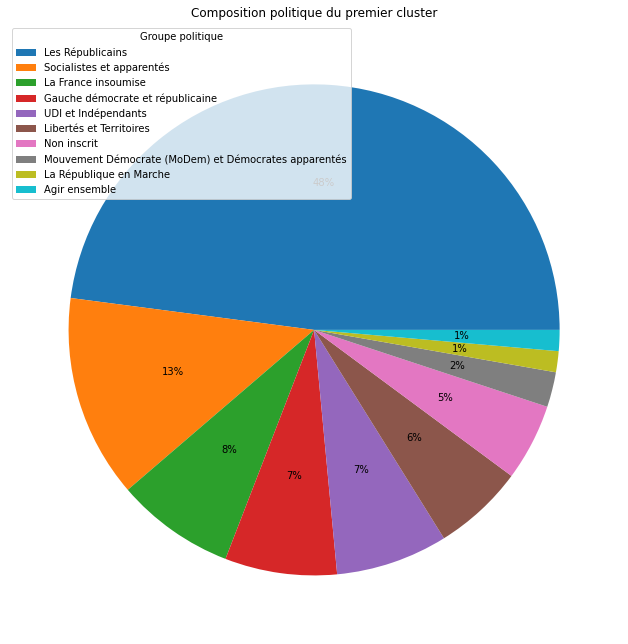

In [245]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

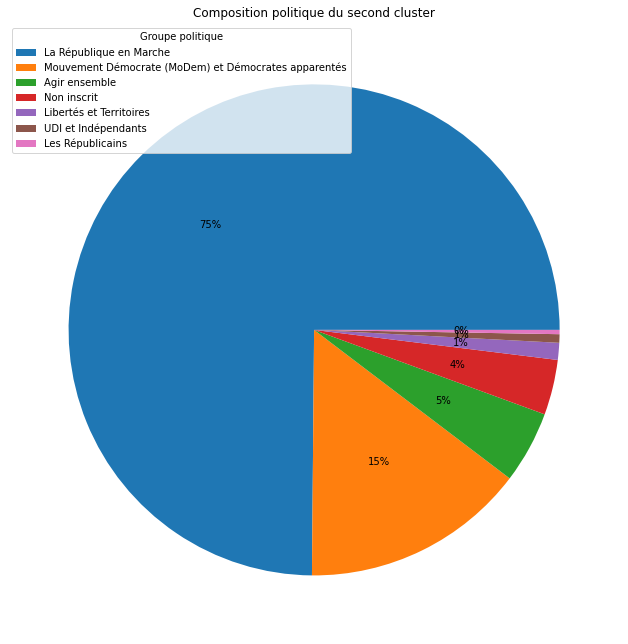

In [246]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats[0]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du second cluster")
labels = list_resultats[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

### 3. 2. Clustering historique de votes uniquement

In [251]:
N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(historique_vote)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(historique_vote)

historique_vote_clusterized = historique_vote.copy()
historique_vote_clusterized['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [252]:
historique_vote_clusterized = historique_vote_clusterized.merge(groupe, left_index=True, right_index=True)
historique_vote_clusterized.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)
historique_vote_clusterized

,0,1,2,3,4,5,6,7,8,9,...,3109,3110,3111,3112,3113,3114,3115,3116,cluster,Groupe
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,0,Socialistes et apparentés
PA1012,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,1,-1,-1,0,Les Républicains
PA1029,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,0,Les Républicains
PA1198,1,-1,-1,-1,-1,1,-1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,0,Socialistes et apparentés
PA1206,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,0,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,Gauche démocrate et républicaine
PA856,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,0,Les Républicains
PA923,1,-1,-1,-1,-1,1,-1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,-1,0,Les Républicains


In [254]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats2 = []
for i in range (N_CLUSTERS):
     list_resultats2.append(historique_vote_clusterized[historique_vote_clusterized['cluster'] == i])

<ipython-input-256-c6db686fdeba>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_resultats2[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',


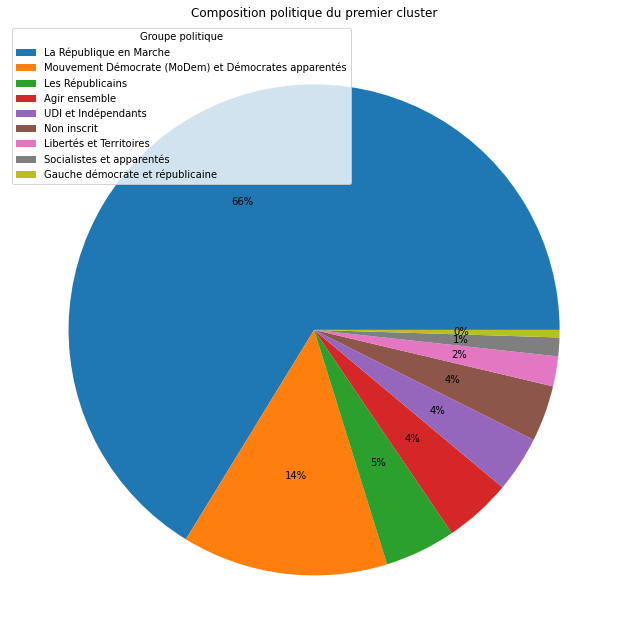

In [256]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats2[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats2[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()


<ipython-input-257-83c1fea11b5b>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_resultats2[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',


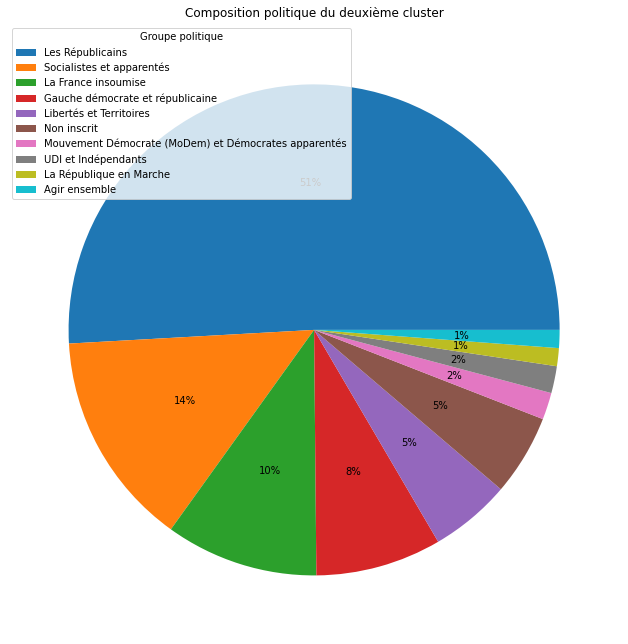

In [257]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats2[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du deuxième cluster")
labels = list_resultats2[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

### 3. 3. Clustering features construite + historique de votes

In [279]:
df_total = df_cluster.merge(historique_vote, on='idVotant', how='left')
df_total_ = df_total.drop(['idVotant'], axis=1)

In [280]:
N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_total_)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_total_)

df_total_clusterized = df_total.copy()
df_total_clusterized['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [283]:
df_total_clusterized

,idVotant,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,...,3109,3110,3111,3112,3113,3114,3115,3116,cluster,Groupe
0,PA1008,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,...,-1,1,-1,1,1,-1,-1,1,1,Socialistes et apparentés
1,PA1012,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,...,-1,1,-1,-1,1,1,-1,-1,1,Les Républicains
2,PA1029,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,...,-1,1,-1,-1,1,-1,-1,-1,1,Les Républicains
3,PA1198,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,...,-1,1,-1,1,1,-1,-1,-1,1,Socialistes et apparentés
4,PA1206,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,...,-1,1,-1,-1,1,-1,-1,-1,1,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,PA774962,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1,1,-1,-1,1,-1,-1,-1,1,Gauche démocrate et républicaine
571,PA856,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,...,-1,1,-1,-1,1,-1,-1,-1,1,Les Républicains
572,PA923,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,...,-1,1,-1,-1,1,-1,-1,-1,1,Les Républicains
573,PA942,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,...,-1,1,-1,-1,1,-1,-1,-1,1,Libertés et Territoires


In [282]:
df_total_clusterized = df_total_clusterized.merge(groupe, on='idVotant', how='left')
df_total_clusterized.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)

In [284]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats3 = []
for i in range (N_CLUSTERS):
     list_resultats3.append(df_total_clusterized[df_total_clusterized['cluster'] == i])

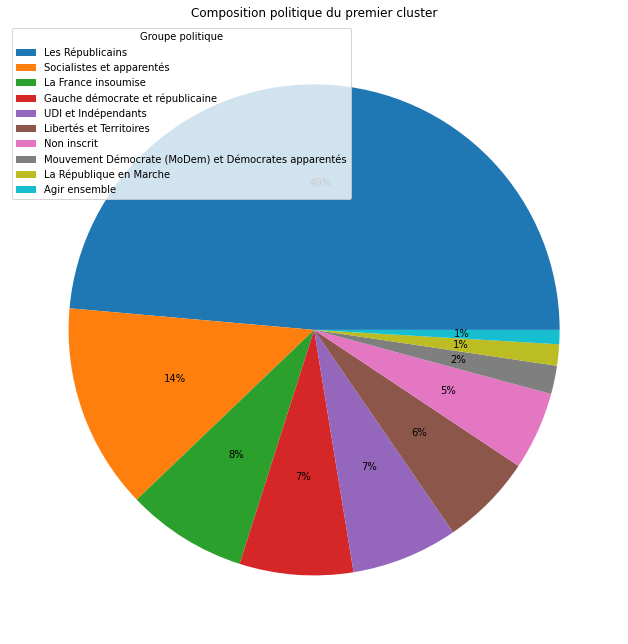

In [285]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats3[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats3[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()



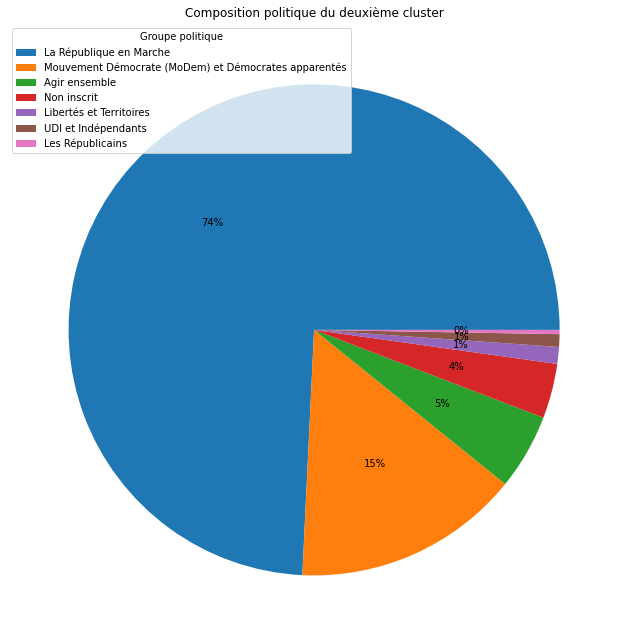

In [286]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats3[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du deuxième cluster")
labels = list_resultats3[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

## 4. Clustering à 3 clusters

### 4. 1. Features construites

In [288]:
df_clusterised = df_cluster.drop(['idVotant'], axis=1)

In [289]:
N_CLUSTERS = 3
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_clusterised)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_clusterised)

df_clusterised['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [290]:
df_clusterised['idVotant'] = df_cluster['idVotant']

df_clusterised = df_clusterised.merge(groupe, on='idVotant', how='left')
df_clusterised.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)
df_clusterised

,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,Les Républicains Contre,...,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour,Pour,Contre,Non-votant,indice_accord,cluster,idVotant,Groupe
0,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,0.414013,...,0.000000,0.413043,0.500000,0.688372,0.311628,0.0,31.937984,1,PA1008,Socialistes et apparentés
1,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,0.250000,...,1.000000,0.437500,0.000000,0.658683,0.341317,0.0,37.425150,2,PA1012,Les Républicains
2,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,0.428571,...,0.000000,0.343750,0.000000,0.481818,0.518182,0.0,43.636364,2,PA1029,Les Républicains
3,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,0.402778,...,0.000000,0.357143,0.333333,0.667656,0.332344,0.0,32.047478,1,PA1198,Socialistes et apparentés
4,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,0.432432,...,0.000000,0.178571,0.000000,0.545455,0.454545,0.0,28.409091,1,PA1206,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.800000,0.0,40.000000,2,PA774962,Gauche démocrate et républicaine
571,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,0.260417,...,0.000000,0.447368,0.000000,0.572193,0.427807,0.0,38.770053,2,PA856,Les Républicains
572,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,0.265625,...,0.000000,0.281250,0.000000,0.580087,0.419913,0.0,40.259740,2,PA923,Les Républicains
573,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,0.419643,...,0.666667,0.606061,0.500000,0.502212,0.497788,0.0,51.327434,2,PA942,Libertés et Territoires


In [291]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats = []
for i in range (N_CLUSTERS):
     list_resultats.append(df_clusterised[df_clusterised['cluster'] == i])
        

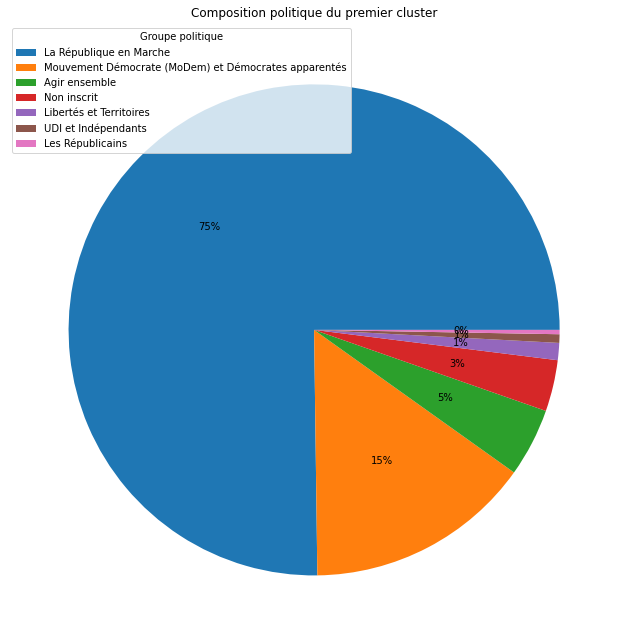

In [293]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

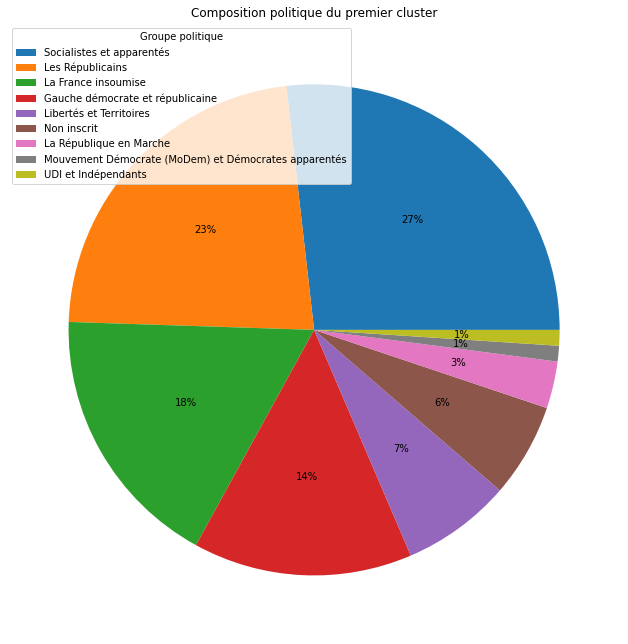

In [292]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du second cluster")
labels = list_resultats[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

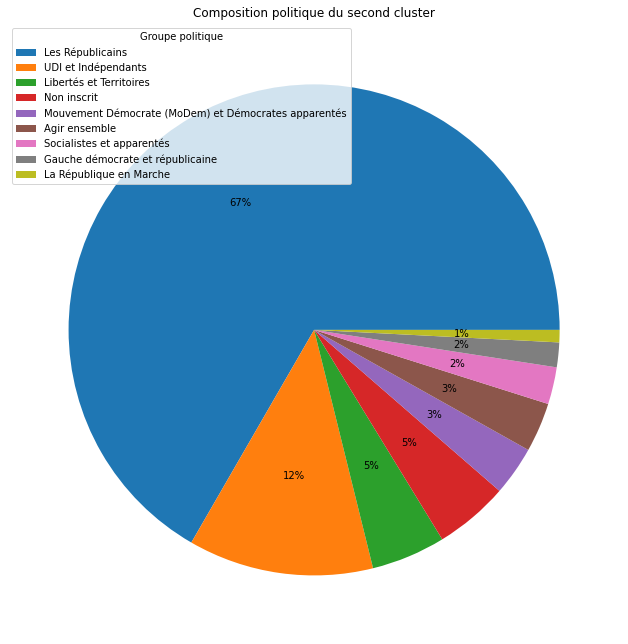

In [294]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats[2]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du second cluster")
labels = list_resultats[2]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

### 4. 2. Historique de vote

In [295]:
N_CLUSTERS = 3
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(historique_vote)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(historique_vote)

historique_vote_clusterized = historique_vote.copy()
historique_vote_clusterized['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [296]:
historique_vote_clusterized = historique_vote_clusterized.merge(groupe, left_index=True, right_index=True)
historique_vote_clusterized.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)
historique_vote_clusterized

,0,1,2,3,4,5,6,7,8,9,...,3109,3110,3111,3112,3113,3114,3115,3116,cluster,Groupe
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,1,Socialistes et apparentés
PA1012,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,1,-1,-1,2,Les Républicains
PA1029,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,2,Les Républicains
PA1198,1,-1,-1,-1,-1,1,-1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,2,Socialistes et apparentés
PA1206,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,2,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,0,Gauche démocrate et républicaine
PA856,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,2,Les Républicains
PA923,1,-1,-1,-1,-1,1,-1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,-1,2,Les Républicains


In [297]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats2 = []
for i in range (N_CLUSTERS):
     list_resultats2.append(historique_vote_clusterized[historique_vote_clusterized['cluster'] == i])

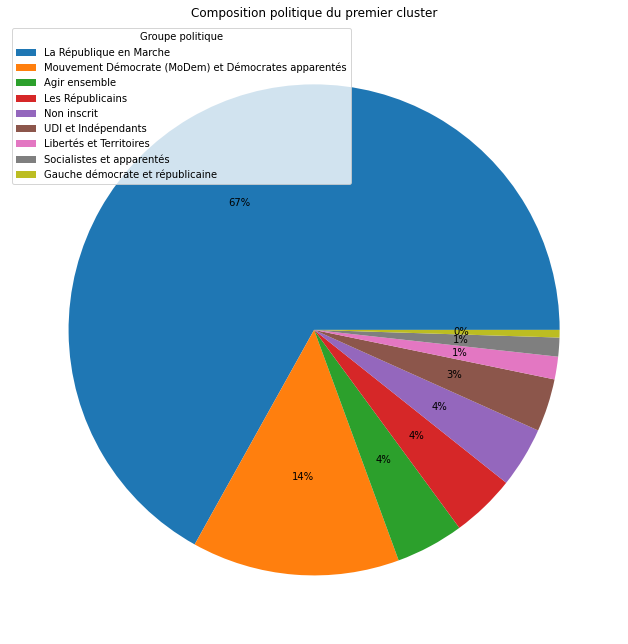

In [298]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats2[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats2[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()


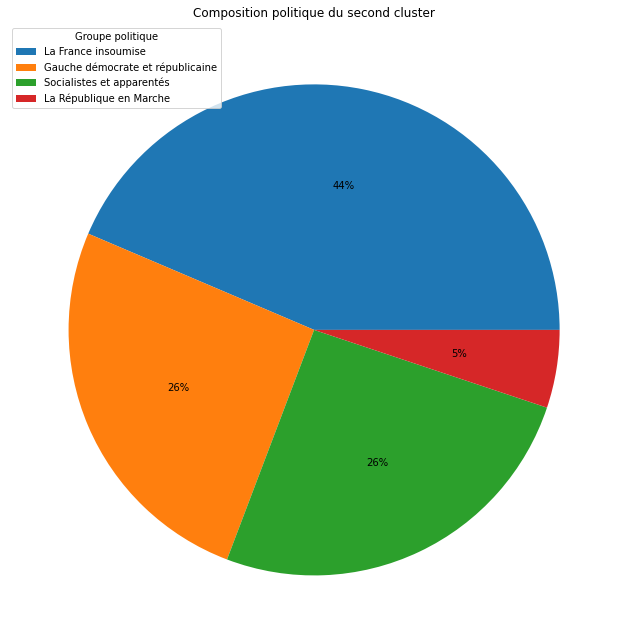

In [299]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats2[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du second cluster")
labels = list_resultats2[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

<ipython-input-300-f15a9db259b3>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_resultats2[2]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',


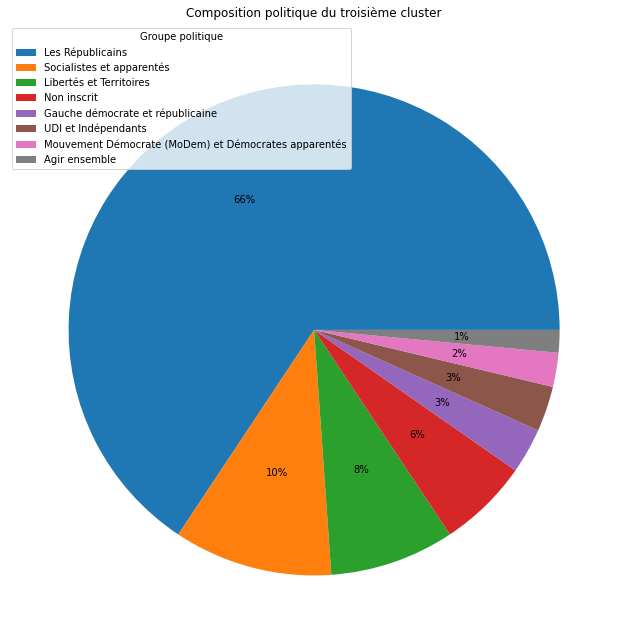

In [300]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats2[2]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du troisième cluster")
labels = list_resultats2[2]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

### 4. 3. Total

In [301]:
df_total = df_cluster.merge(historique_vote, on='idVotant', how='left')
df_total_ = df_total.drop(['idVotant'], axis=1)
N_CLUSTERS = 3
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_total_)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_total_)

df_total_clusterized = df_total.copy()
df_total_clusterized['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [302]:
df_total_clusterized = df_total_clusterized.merge(groupe, on='idVotant', how='left')
df_total_clusterized.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)

In [303]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats3 = []
for i in range (N_CLUSTERS):
     list_resultats3.append(df_total_clusterized[df_total_clusterized['cluster'] == i])

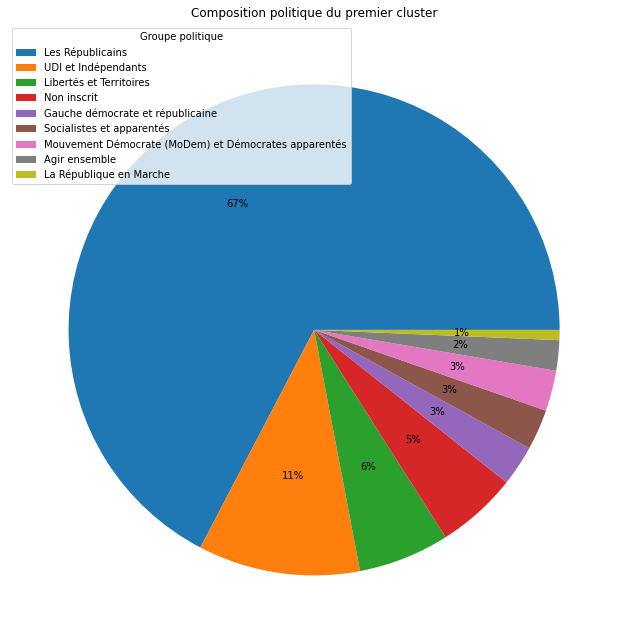

In [304]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats3[0]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_resultats3[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

<ipython-input-305-dc087cb62123>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_resultats3[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',


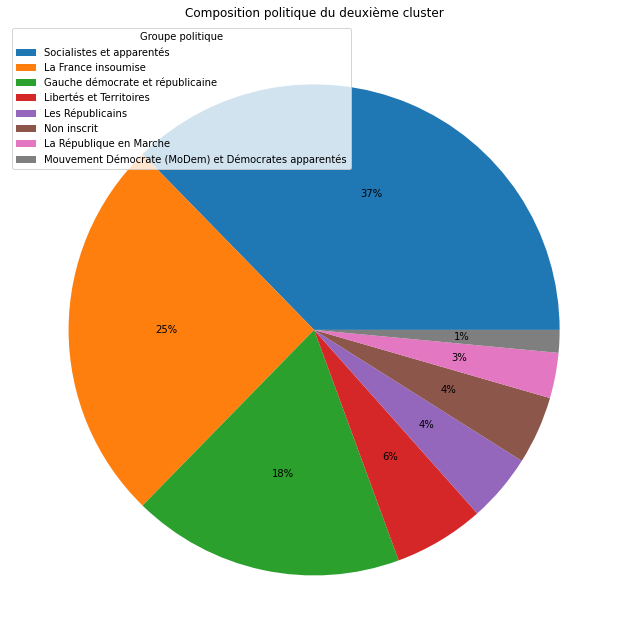

In [305]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats3[1]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du deuxième cluster")
labels = list_resultats3[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

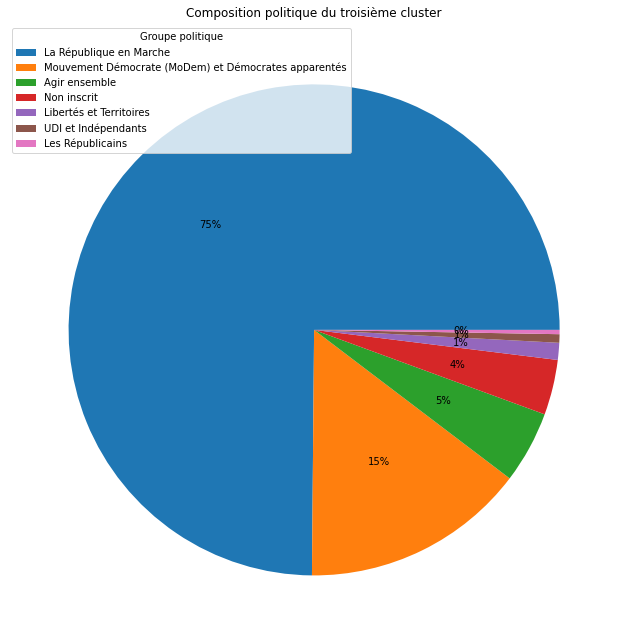

In [306]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_resultats3[2]['Groupe'].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du troisième cluster")
labels = list_resultats3[2]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

## 4. ACP 

In [307]:
groupe_to_labels = {groupe : idx for idx, groupe in enumerate(df_clusterised.Groupe.unique())}
labels_to_groupe = {label : groupe for groupe, label in groupe_to_labels.items()}

labels = [groupe_to_labels[groupe] for groupe in df_clusterised.Groupe]

df_clusterised['labels'] = labels


In [313]:
df_clusterised_preacp = df_clusterised.drop(['cluster', 'labels', 'idVotant','Groupe'], axis=1)
df_clusterised_preacp

,La République en Marche Contre,Socialistes et apparentés Contre,La France insoumise Contre,Écologie Démocratie Solidarité Contre,"UDI, Agir et Indépendants Contre",Nouvelle Gauche Contre,Gauche démocrate et républicaine Contre,Mouvement Démocrate et apparentés Contre,Libertés et Territoires Contre,Les Républicains Contre,...,Libertés et Territoires Pour,Les Républicains Pour,Agir Ensemble Pour,Commission Pour,Conférence des Présidents Pour,Gouvernement Pour,Pour,Contre,Non-votant,indice_accord
0,0.411765,0.168675,0.232394,0.111111,0.371429,0.275000,0.293578,0.181818,0.176471,0.414013,...,0.823529,0.585987,0.0,0.000000,0.413043,0.500000,0.688372,0.311628,0.0,31.937984
1,0.392857,0.375000,0.406250,0.400000,0.150000,0.473684,0.333333,1.000000,0.125000,0.250000,...,0.875000,0.750000,0.0,1.000000,0.437500,0.000000,0.658683,0.341317,0.0,37.425150
2,0.375000,0.500000,0.428571,0.333333,0.000000,0.750000,0.461538,0.000000,0.000000,0.428571,...,1.000000,0.571429,0.0,0.000000,0.343750,0.000000,0.481818,0.518182,0.0,43.636364
3,0.366667,0.179487,0.294118,0.250000,0.545455,0.250000,0.241935,0.000000,0.250000,0.402778,...,0.750000,0.597222,0.0,0.000000,0.357143,0.333333,0.667656,0.332344,0.0,32.047478
4,0.416667,0.391304,0.235294,0.500000,0.000000,0.500000,0.437500,0.000000,0.500000,0.432432,...,0.500000,0.567568,1.0,0.000000,0.178571,0.000000,0.545455,0.454545,0.0,28.409091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.800000,0.0,40.000000
571,0.472222,0.375000,0.448276,0.166667,0.333333,0.607143,0.492537,0.666667,0.200000,0.260417,...,0.800000,0.739583,0.0,0.000000,0.447368,0.000000,0.572193,0.427807,0.0,38.770053
572,0.500000,0.409091,0.431818,0.500000,0.230769,0.500000,0.428571,0.500000,0.666667,0.265625,...,0.333333,0.734375,0.0,0.000000,0.281250,0.000000,0.580087,0.419913,0.0,40.259740
573,0.500000,0.526316,0.658228,0.666667,0.346154,0.653846,0.452381,0.500000,0.428571,0.419643,...,0.571429,0.580357,0.0,0.666667,0.606061,0.500000,0.502212,0.497788,0.0,51.327434


Variance: [0.3657211  0.29169467 0.05790109 0.03416857 0.02928934 0.02608462
 0.02306499 0.02199387 0.0192142  0.01739175]
Variance totale: 0.886524188254953


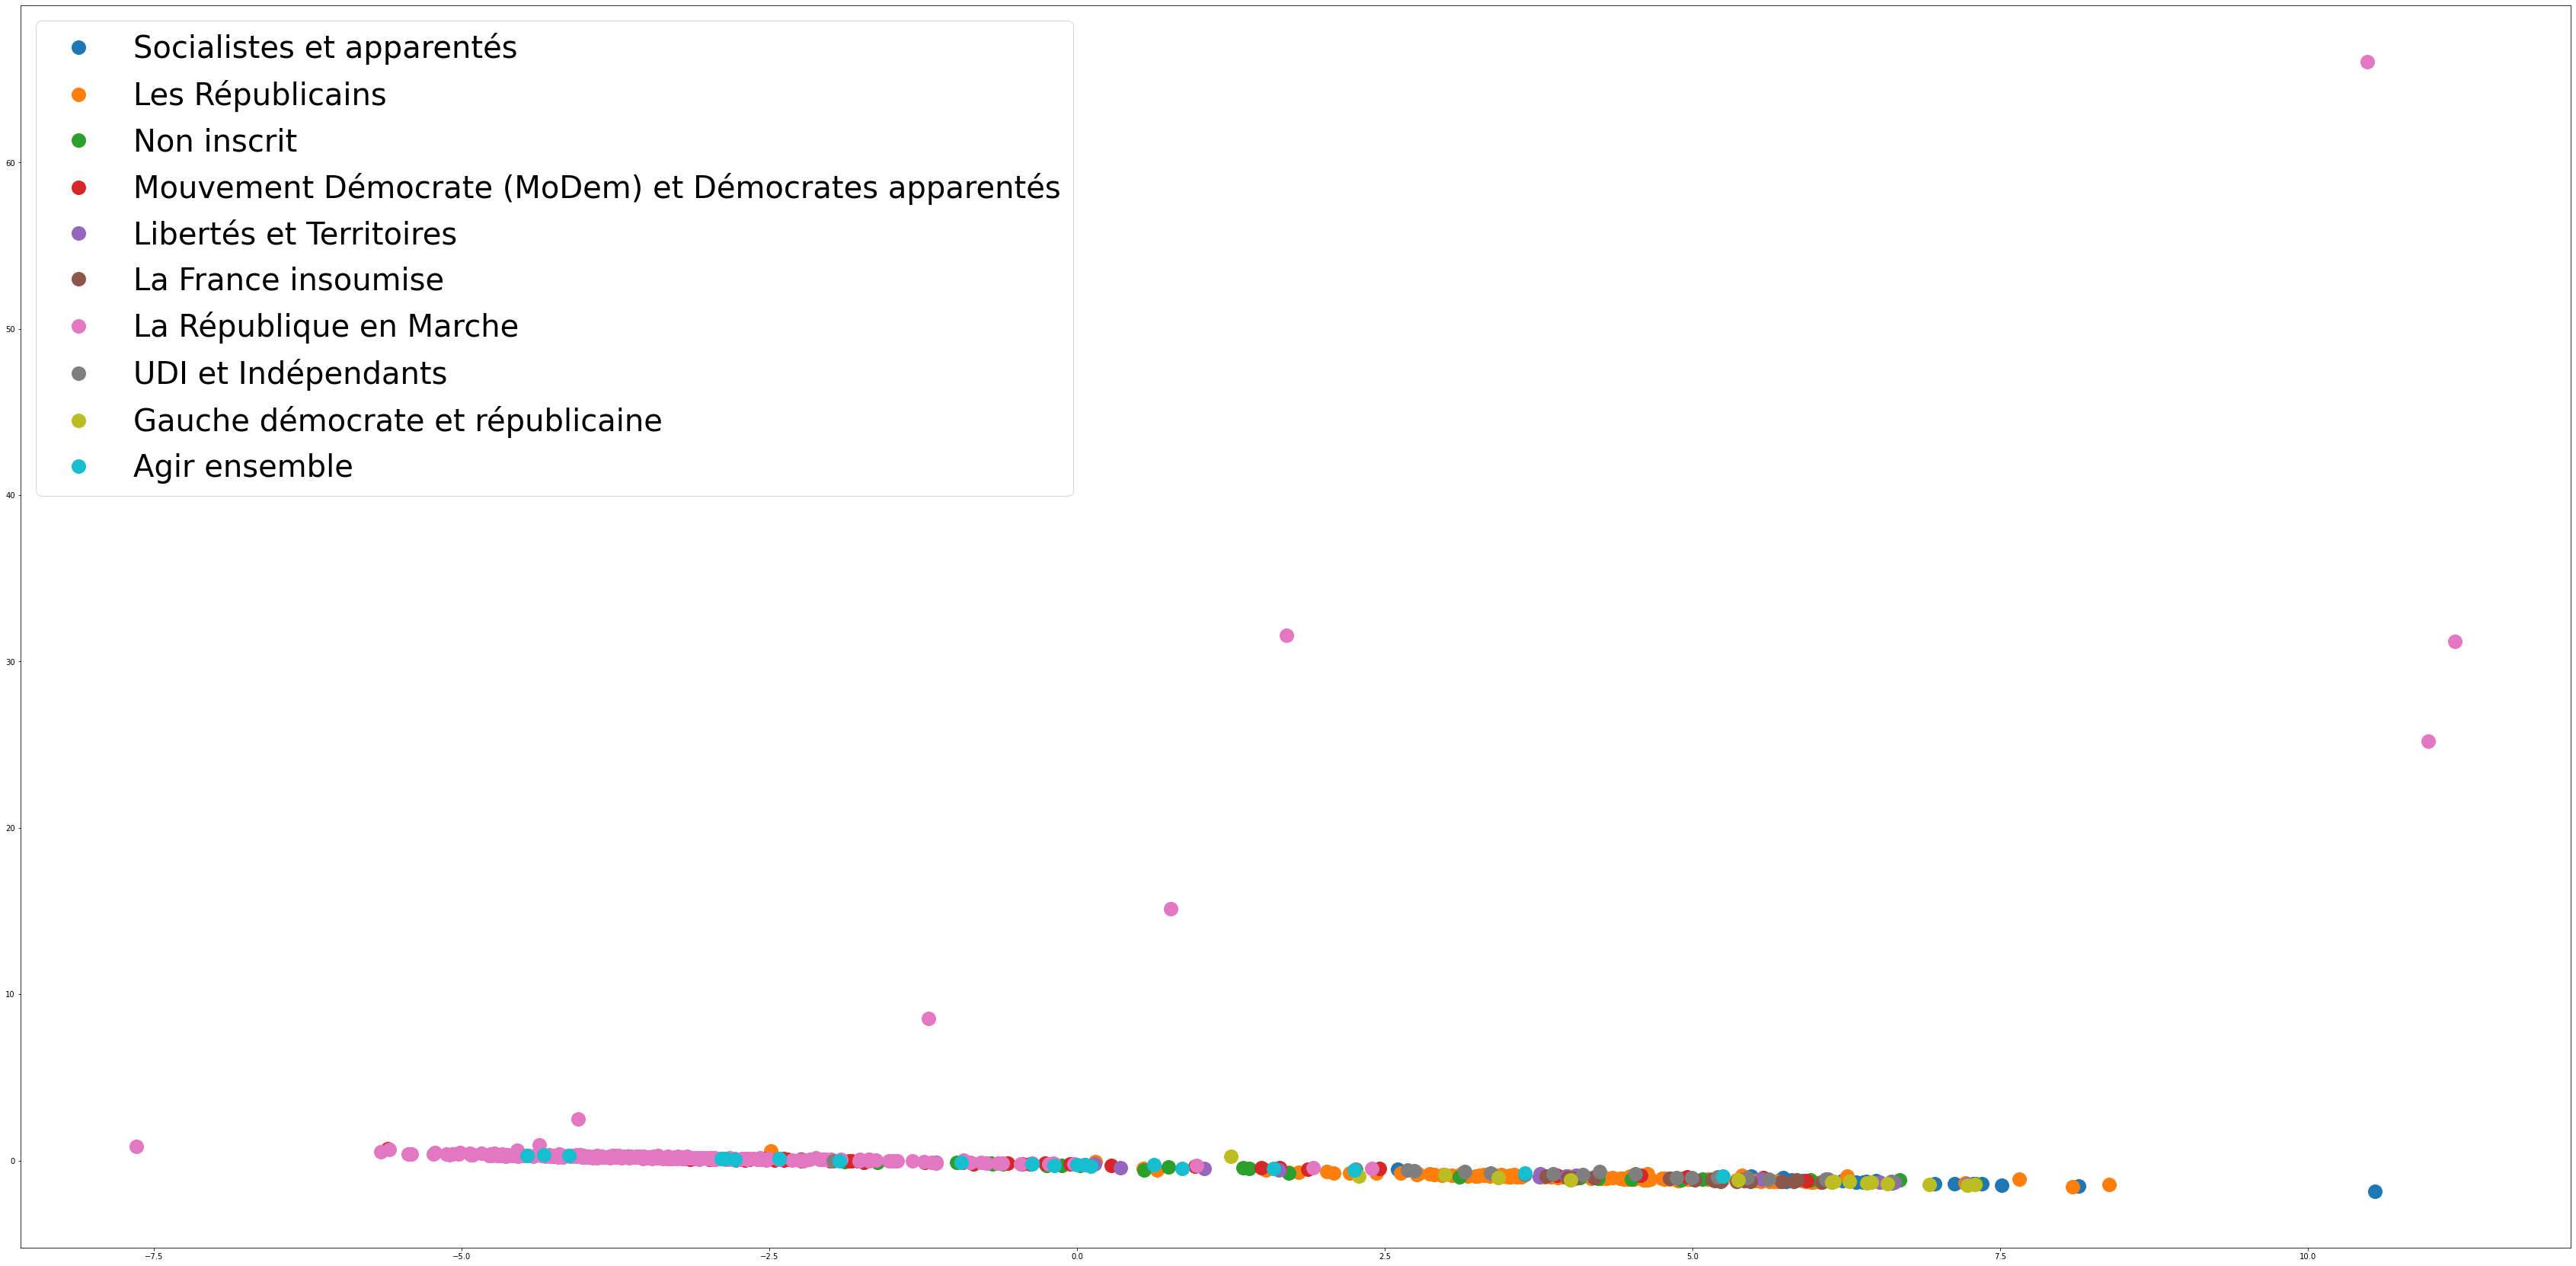

In [337]:
df_clusterised_transform = StandardScaler().fit_transform(df_clusterised_preacp)
pca = PCA(n_components=10).fit(df_clusterised_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())

resultats_reduced = pca.transform(df_clusterised_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 40)

plt.show()


Variance: [0.11380505 0.04854384 0.03684866 0.02701137 0.01907043 0.01865471
 0.01574436 0.01369251 0.01335935 0.01293669]
Variance totale: 0.3196669719286028


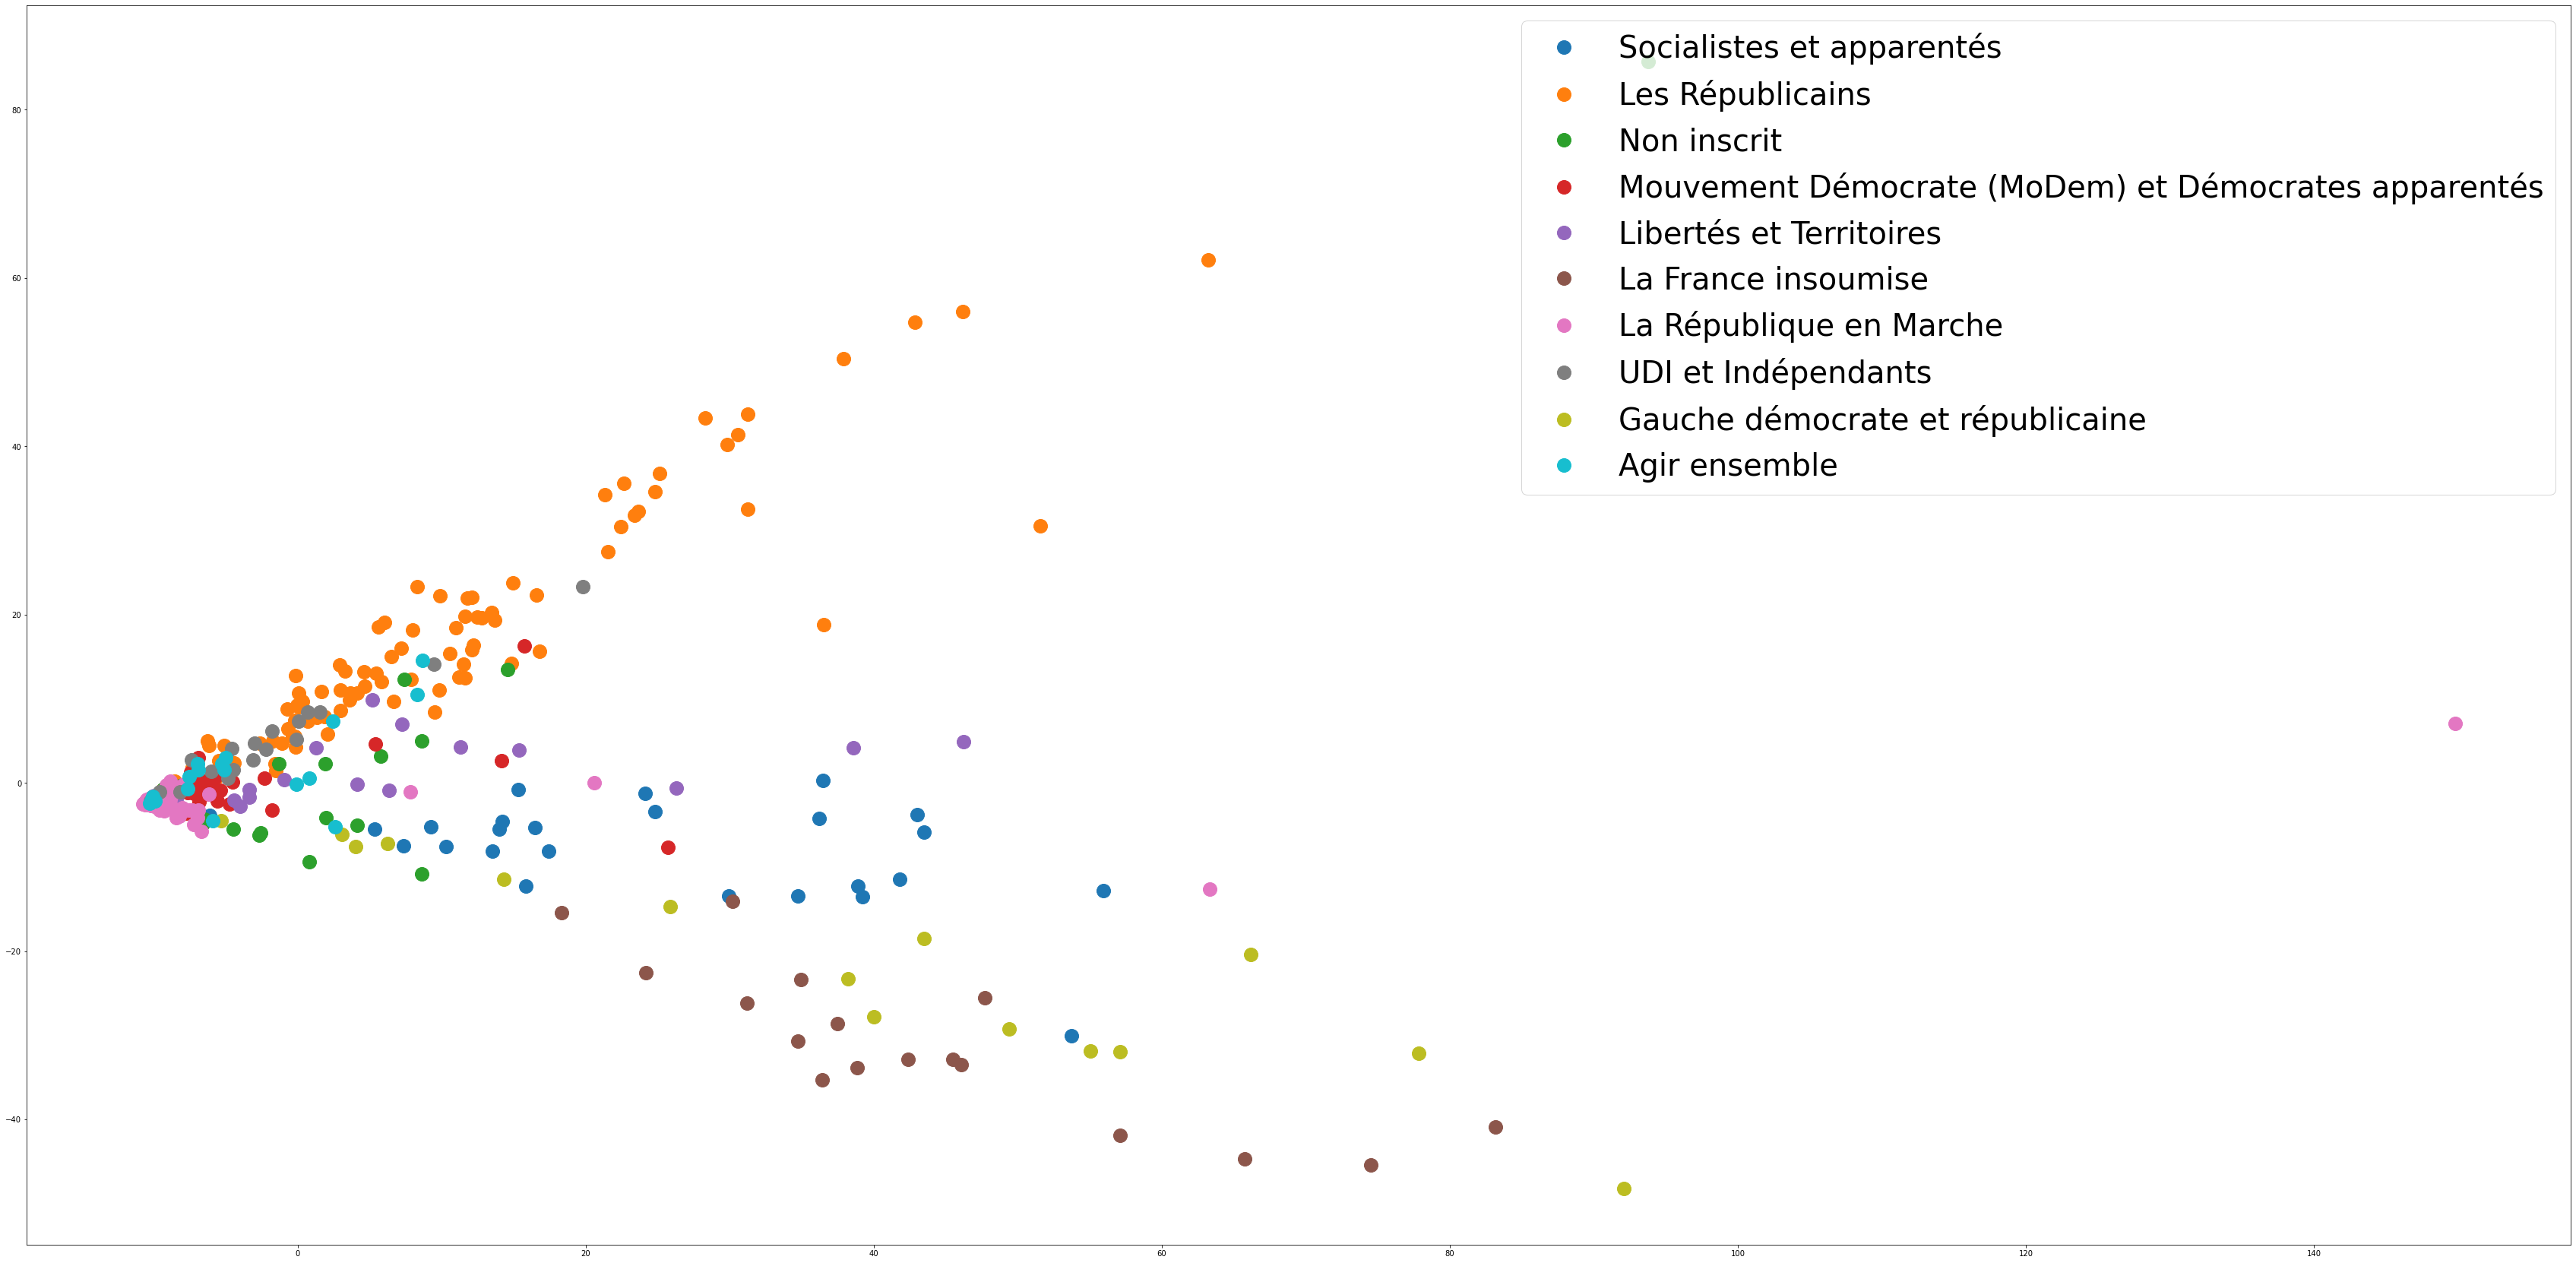

In [340]:
historique_vote_transform = StandardScaler().fit_transform(historique_vote)
pca = PCA(n_components=10).fit(historique_vote_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())


resultats_reduced = pca.transform(historique_vote_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]


df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 40)

plt.show()



Variance: [0.11479399 0.0480243  0.03706109 0.02751798 0.01890483 0.0184579
 0.01687837 0.01375497 0.01321298 0.01279813]
Variance totale: 0.32140454510474503


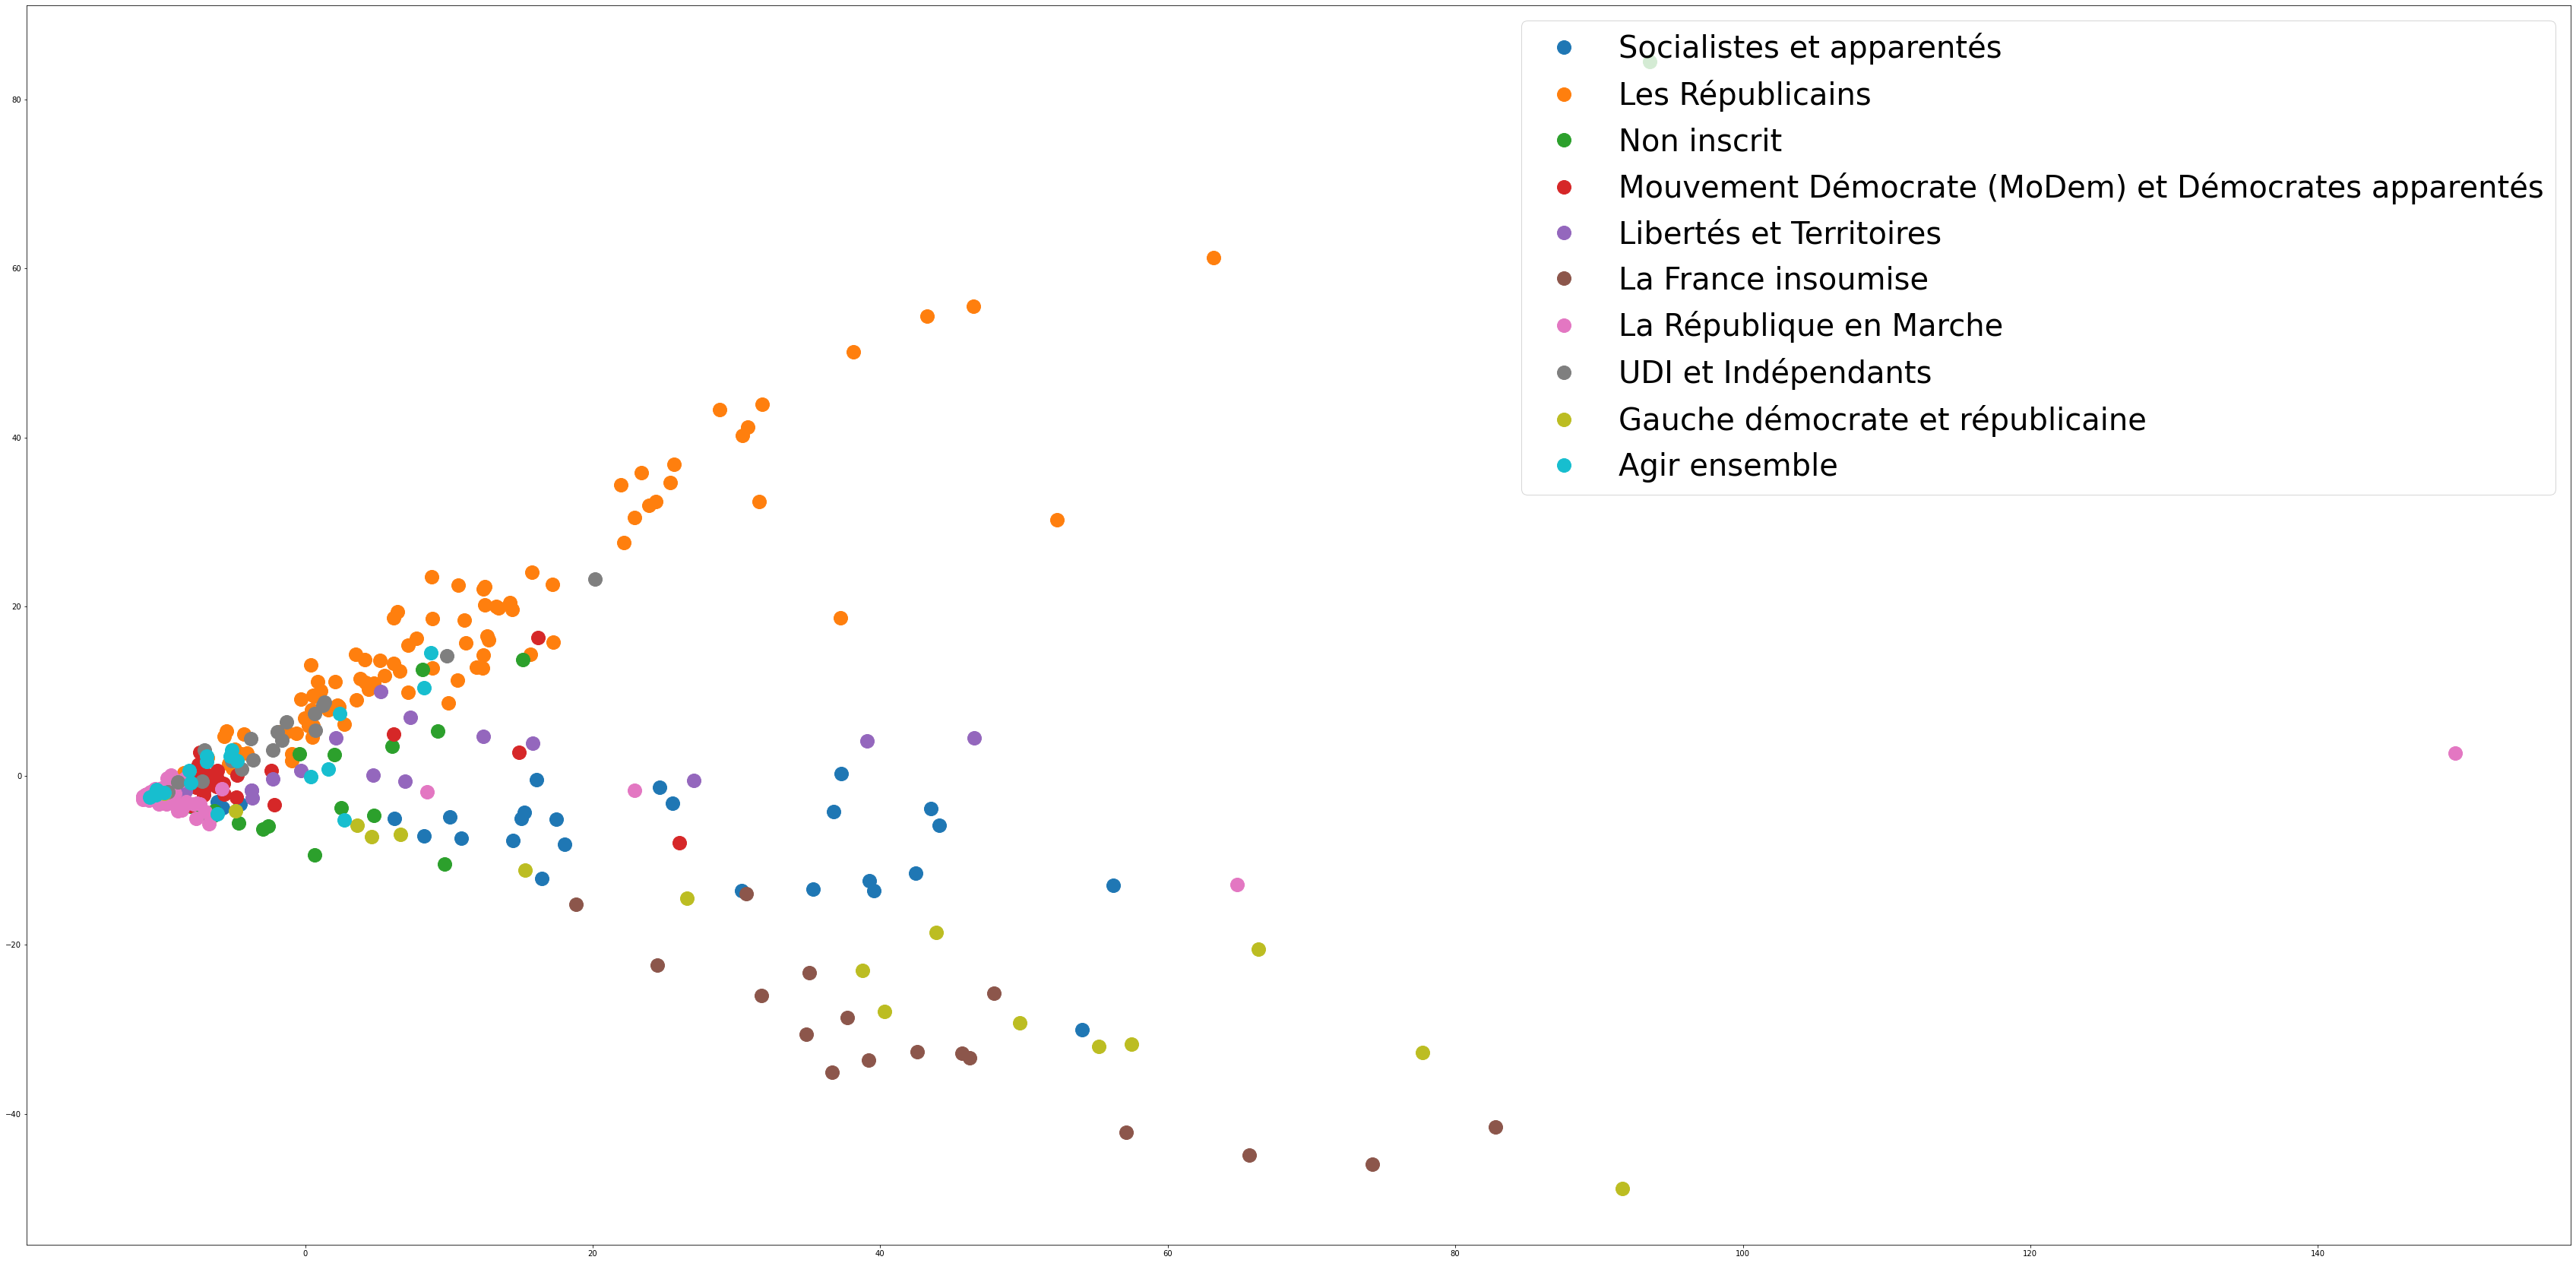

In [341]:
df_total_transform = StandardScaler().fit_transform(df_total.drop(['idVotant'], axis=1))
pca = PCA(n_components=10).fit(df_total_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())


resultats_reduced = pca.transform(df_total_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 40)

plt.show()


